# Project: Wrangle and Analyse Data - 'WeRateDogs'

<a id='top'></a>
### Project Breakdown:
### We will gather, assess and clean a Dataset based on Informations from the Twitter Archive from the Account "@WeRateDogs", to provide an Analysis and Visualization of Variables of Interests that we will chose to inspect.

- [Gathering Data](#gather)
- [Assessing](#assess)
- [Cleaning](#clean)
- [Analyzing & Visualizing](#analyse)

## Gathering Data
<a id='gather'></a>

### First Piece of Data aquired from a csv File:

In [1]:
# import needed Libraries for the whole Project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df_tweetArchive = pd.read_csv('twitter-archive-enhanced.csv')
df_tweetArchive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
df_tweetArchive.info()
df_tweetArchive.tweet_id.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

0

### Second Piece of Data: programmatically downloading a tsv File:

In [4]:
import requests
import os

filename = 'image-predictions.tsv'
file_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/\
599fd2ad_image-predictions/image-predictions.tsv'

if not os.path.exists(filename):
    # download the file locally
    response = requests.get(file_url)
    if (response.status_code == 200):
        with open(filename, mode='wb') as file:
            file.write(response.content)

In [5]:
os.listdir() #to check the file was downloaded in the current directory

['.DS_Store',
 '.ipynb_checkpoints',
 'cleaning_overview.ipynb',
 'Help',
 'image-predictions.tsv',
 'old',
 'ReadMe.txt',
 'regex_wrangle.txt',
 'tweet_json Kopie.txt',
 'tweet_json.txt',
 'tweetid_errors.txt',
 'tweetid_success.txt',
 'twitter-archive-enhanced Kopie.csv',
 'twitter-archive-enhanced.csv',
 'twitterKeys.txt',
 'wrangle_act.ipynb']

In [6]:
#Now we read in the tsv file
df_image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Third Piece of Data: querying the Twitter API with 'tweepy'

In [7]:
import tweepy
import json

#### Prepare files to hold queryied Information
jsonfilename = 'tweet_json.txt' #to hold each tweet_data query as a line
tweetid_errors = 'tweetid_errors.txt' # to keep trace of each tweet that could not be queryied.
tweetid_success = 'tweetid_success.txt' # to keep trace of each successfully queryied tweet for debug purposes

In [8]:
consumer_key = 'TOPSECRET'
consumer_secret = 'TOPSECRET'
access_token = 'ALSOTOPSECRET'
access_secret = 'SAMESAMESECRET'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

tweep_api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

# first test the tweepy API
obj_return = tweep_api.rate_limit_status()
print(json.dumps(obj_return, indent=4))


{
    "rate_limit_context": {
        "access_token": "1111721486312751104-2NDoW9l9keGbw9ZcPj7naFuuyWCVVQ"
    },
    "resources": {
        "lists": {
            "/lists/list": {
                "limit": 15,
                "remaining": 15,
                "reset": 1556375522
            },
            "/lists/memberships": {
                "limit": 75,
                "remaining": 75,
                "reset": 1556375522
            },
            "/lists/subscribers/show": {
                "limit": 15,
                "remaining": 15,
                "reset": 1556375522
            },
            "/lists/members": {
                "limit": 900,
                "remaining": 900,
                "reset": 1556375522
            },
            "/lists/subscriptions": {
                "limit": 15,
                "remaining": 15,
                "reset": 1556375522
            },
            "/lists/show": {
                "limit": 75,
                "remaining": 75,
              

In [9]:
# get the tweet_ids to query (as strings better as int64, as recommended in twitter docs)
tweetlist = df_tweetArchive['tweet_id'].astype(str).values
print(tweetlist[:10])


['892420643555336193' '892177421306343426' '891815181378084864'
 '891689557279858688' '891327558926688256' '891087950875897856'
 '890971913173991426' '890729181411237888' '890609185150312448'
 '890240255349198849']


This Code Cell querying the Twitter API with 'tweepy' has been run, then set as a Markdown Cell, to prevent launching this long programmatic Process again

#tweet_id = '892420643555336193'# testing the API with one tweet_id
#wrong_tweets = ['8975987', '8768745'] # testing the loop with non existing tweet_ids --> catching Exceptions

for each_tweet in tweetlist:
    try:
        status_object = tweep_api.get_status(each_tweet, tweet_mode='extended')
        json_string = json.dumps(status_object._json)
        # write as a line in tweet_json.txt
        with open(jsonfilename, mode='a', encoding='utf-8') as fh:
            fh.write(json_string + '\n')
        with open(tweetid_success, mode='a', encoding='utf-8') as file:
            file.write(each_tweet + '\n')
    except Exception as e:
        #catch all Exceptions and log Error with tweet_id!
        with open(tweetid_errors, mode='a', encoding='utf-8') as textfile:
            textfile.write(each_tweet + ': ')
            textfile.write(str(e) + '\n')
        pass


In [10]:
# Reading in the tweet_json.txt File in a pandas Dataframe
# we read the file line by line, add each resulting JSON Object in a list and finally convert this into a DataFrame
list_tweets = []
with open("tweet_json.txt", encoding='utf-8') as filehandle:
    for line in filehandle: # read line by line
        jsonobj = json.loads(line.strip())#not forgetting to strip the character '\n' from the string
        # Append to list of dictionaries
        list_tweets.append(jsonobj)
        
df_tweepy = pd.DataFrame(list_tweets)

In [11]:
df_tweepy.head()

#df_tweepy.id.duplicated().sum()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",37702,False,This is Phineas. He's a mystical boy. Only eve...,None,...,NaN,NaN,NaN,NaN,8217,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",32382,False,This is Tilly. She's just checking pup on you....,None,...,NaN,NaN,NaN,NaN,6075,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",24381,False,This is Archie. He is a rare Norwegian Pouncin...,None,...,NaN,NaN,NaN,NaN,4017,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,None,None,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",41016,False,This is Darla. She commenced a snooze mid meal...,None,...,NaN,NaN,NaN,NaN,8370,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,None,None,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",39206,False,This is Franklin. He would like you to stop ca...,None,...,NaN,NaN,NaN,NaN,9075,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [12]:
df_tweepy.shape

(2339, 32)

[Back to Top](#top)

<a id='assess'></a>
## Assessing

- [Assessing the Archive DataFrame](#archive)
- [Assessing the Tweepy Dataframe](#tweepy)
- [Assessing the Predictions Dataframe](#predict)

### 1.Assessing the Archive
<a id='archive'></a>

In [13]:
df_tweetArchive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [14]:
df_tweetArchive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


#### Prepare a Working Copy :
We already make a copy of the Archive Dataframe we want to work with, as we want to drop uninteresting Columns, to make a visual Assessment easyier.

In [15]:
# Work on a copy of the tweet Archive
df_archive = df_tweetArchive.copy()

# Drop uninteresting Columns
columns_todrop = ['in_reply_to_status_id', 'in_reply_to_user_id', 'source', 'retweeted_status_timestamp']
df_archive.drop(columns=columns_todrop, inplace=True)
df_archive.head(3)

,tweet_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


Visual Assessment with ```head(), tail() and sample()``` methods:


In [16]:
df_samp = df_archive.sample(5)
df_samp

,tweet_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
559,803276597545603072,2016-11-28 16:37:19 +0000,This is Winston. His selfie game is legendary....,NaN,NaN,https://twitter.com/dog_rates/status/803276597...,11,10,Winston,None,None,None,None
744,780192070812196864,2016-09-25 23:47:39 +0000,We only rate dogs. Pls stop sending in non-can...,NaN,NaN,https://twitter.com/dog_rates/status/780192070...,11,10,None,None,None,None,None
802,772193107915964416,2016-09-03 22:02:38 +0000,This is Willem. He's a Penn State pupper. Thin...,NaN,NaN,https://twitter.com/dog_rates/status/772193107...,12,10,Willem,None,None,pupper,None
1737,679530280114372609,2015-12-23 05:13:38 +0000,Guys this really needs to stop. We've been ove...,NaN,NaN,https://twitter.com/dog_rates/status/679530280...,7,10,a,None,None,None,None
2030,671789708968640512,2015-12-01 20:35:22 +0000,This is space pup. He's very confused. Tries t...,NaN,NaN,https://twitter.com/dog_rates/status/671789708...,13,10,space,None,None,None,None


In [17]:
df_archive.tail()

,tweet_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,2015-11-16 00:24:50 +0000,Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,2015-11-16 00:04:52 +0000,This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,2015-11-15 23:21:54 +0000,Here is a very happy pup. Big fan of well-main...,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,2015-11-15 23:05:30 +0000,This is a western brown Mitsubishi terrier. Up...,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,2015-11-15 22:32:08 +0000,Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [18]:
# Checking for duplicate rows:
df_archive.duplicated().sum()

0

In [19]:
# Checking that each tweet id appears just once.
df_archive.tweet_id.nunique()

2356

There are no duplicated Records and each row describes a distinct tweet.

#### Inspecting missing values in the Archive Dataframe:

There are missing values in the Columns: 'retweeted_status_id', 'retweeted_status_user_id'and 'expanded_urls'.

- For the first two Columns, the non-null Values indicate that the tweet is a re-tweet and we want to drop those,
as we only want <i>original</i> Tweets. After this has been done, we will drop these two Columns. So we don't have a completeness issue with missing values here.

- The expended_url is the tweet url and should not be missing. We will have to inspect this further.

#### Quality Issues in the Archive Dataframe:

- 1. timestamp should be a datetime Object.
- 2. some tweets are obsolete and must be removed (could not be fetched from the tweepy API)
- 3. some tweets are retweets (181 non null 'retweeted_status_id') and must be removed
- 4. there are missing values in the 'expended_urls' Column.

Now we inspect the Rating Values:

In [20]:
# Inspecting the ratings
df_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [21]:
# values of numerator for values of denominator
df_archive.groupby(['rating_denominator'])['rating_numerator'].value_counts()

rating_denominator  rating_numerator
0                   960                   1
2                   1                     1
7                   24                    1
10                  12                  558
                    11                  463
                    10                  461
                    13                  351
                    9                   156
                    8                   102
                    7                    54
                    14                   54
                    5                    37
                    6                    32
                    3                    19
                    4                    15
                    2                     9
                    1                     8
                    0                     2
                    15                    2
                    75                    2
                    420                   2
                    17                 

In [22]:
# Inspect the denominator different than 10:
df_archive_denominators = df_archive[df_archive.rating_denominator != 10]
df_archive_denominators.shape

(23, 13)

In [23]:
df_archive_denominators.head(12)

,tweet_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,2017-02-24 21:54:03 +0000,@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,2017-02-16 04:45:50 +0000,@docmisterio account started on 11/15/15,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,2017-01-15 17:52:40 +0000,The floofs have been released I repeat the flo...,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,2016-12-19 23:06:23 +0000,Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,2016-09-11 22:20:06 +0000,"RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,2016-07-28 01:00:57 +0000,Why does this never happen at my front door......,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,2016-06-08 02:41:38 +0000,"After so many requests, this is Bretagne. She ...",NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,2016-05-13 16:15:54 +0000,Say hello to this unbelievably well behaved sq...,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,2016-04-21 02:25:47 +0000,Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,2016-04-03 01:36:11 +0000,This is Bluebert. He just saw that both #Final...,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [24]:
df_archive_denominators.tail(12)

,tweet_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1254,710658690886586372,2016-03-18 02:46:49 +0000,Here's a brigade of puppers. All look very pre...,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None
1274,709198395643068416,2016-03-14 02:04:08 +0000,"From left to right:\nCletus, Jerome, Alejandro...",NaN,NaN,https://twitter.com/dog_rates/status/709198395...,45,50,None,None,None,None,None
1351,704054845121142784,2016-02-28 21:25:30 +0000,Here is a whole flock of puppers. 60/50 I'll ...,NaN,NaN,https://twitter.com/dog_rates/status/704054845...,60,50,a,None,None,None,None
1433,697463031882764288,2016-02-10 16:51:59 +0000,Happy Wednesday here's a bucket of pups. 44/40...,NaN,NaN,https://twitter.com/dog_rates/status/697463031...,44,40,None,None,None,None,None
1598,686035780142297088,2016-01-10 04:04:10 +0000,Yes I do realize a rating of 4/20 would've bee...,NaN,NaN,NaN,4,20,None,None,None,None,None
1634,684225744407494656,2016-01-05 04:11:44 +0000,"Two sneaky puppers were not initially seen, mo...",NaN,NaN,https://twitter.com/dog_rates/status/684225744...,143,130,None,None,None,None,None
1635,684222868335505415,2016-01-05 04:00:18 +0000,Someone help the girl is being mugged. Several...,NaN,NaN,https://twitter.com/dog_rates/status/684222868...,121,110,None,None,None,None,None
1662,682962037429899265,2016-01-01 16:30:13 +0000,This is Darrel. He just robbed a 7/11 and is i...,NaN,NaN,https://twitter.com/dog_rates/status/682962037...,7,11,Darrel,None,None,None,None
1663,682808988178739200,2016-01-01 06:22:03 +0000,"I'm aware that I could've said 20/16, but here...",NaN,NaN,NaN,20,16,None,None,None,None,None
1779,677716515794329600,2015-12-18 05:06:23 +0000,IT'S PUPPERGEDDON. Total of 144/120 ...I think...,NaN,NaN,https://twitter.com/dog_rates/status/677716515...,144,120,None,None,None,None,None


We want to have a closer look at the texts of the tweets these rating denominators were extracted from:

In [25]:
for i in df_archive_denominators.index:
    print(df_archive_denominators.loc[i].text)

@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
@docmisterio account started on 11/15/15
The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
This is Bluebert. He just saw that both #Fin

Now we want to inspect the values for the numerator, where the denominator is "normal", equal to 10

In [26]:
# inspect the numerator for valid denominator
df_archive.query('rating_denominator == 10')['rating_numerator'].value_counts()

12      558
11      463
10      461
13      351
9       156
8       102
14       54
7        54
5        37
6        32
3        19
4        15
2         9
1         8
75        2
0         2
420       2
15        2
26        1
182       1
27        1
1776      1
17        1
666       1
Name: rating_numerator, dtype: int64

In [27]:
# Inspect the tweets with denominator 10 and with weird values...

In [28]:
df_weird_num = df_archive.query('rating_denominator == 10 and rating_numerator >14')
print(df_weird_num.shape)
for i in df_weird_num.index:
    print(df_weird_num.loc[i].text)

(12, 13)
@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s
@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research
@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10
RT @KibaDva: I collected all the good dogs!! 15/10 @dog_rates #GoodDogs https://t.co/6UCGFczlOI
@markhoppus 182/10
@bragg6of8 @Andy_Pace_ we are still looking for the first 15/10
RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…
This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS
This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
This is Atticus. He's quite simply America af. 1776/10 https://t.co

In [29]:
df_weird_num.tail(3)

,tweet_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,2016-07-04 15:00:45 +0000,This is Atticus. He's quite simply America af....,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None
1712,680494726643068929,2015-12-25 21:06:00 +0000,Here we have uncovered an entire battalion of ...,NaN,NaN,https://twitter.com/dog_rates/status/680494726...,26,10,None,None,None,None,None
2074,670842764863651840,2015-11-29 05:52:33 +0000,After so many requests... here you go.\n\nGood...,NaN,NaN,https://twitter.com/dog_rates/status/670842764...,420,10,None,None,None,None,None


#### Assessments and Decisions made about how to handle the rating numerator and denominator:

- It seems that the Ratings were sometimes not correctly parsed, and that the method used for this, only looked for a "/" Character in the text. So any expression like "She smiles 24/7" or a Reference to "9/11" would be mistaken for a rating, leading to an accuracy issue.
- Also, some ratings are intentionally inconsistent like '960/00' or often a fantasy way of aggregating all ratings together, when there would be several dogs in a tweet, like rating 9 dogs with 99/90 or 8 dogs with 80/80, for instance.
- Another Problem I could identify is that the parsing method used, did not work with float numbers as numerator. For instance '9.75/10' was parsed as '75' for the numerator.

So we can enumerate the corresponding following Issues:

#### Quality Issue in the Archive
- 5. The ratings were parsed from the Text with a Method that led to accuracy issues
- 6. the data type for the numerator should be a float, not an integer
- 7. Some Ratings voluntary are 'fantasy' Values. We decide to keep only tweets that have a rating between 0 and 14 (there is enough fantasy in this anyway). 

#### Tidiness Issue in the Archive
- 1. The rating for each record is kept in two Columns 'rating_numerator' and 'rating_denominator'. We want each Variable describe in one Column.


In [30]:
# Inspecting the name
df_archive.name.value_counts()

None         745
a             55
Charlie       12
Oliver        11
Lucy          11
Cooper        11
Lola          10
Penny         10
Tucker        10
Winston        9
Bo             9
Sadie          8
the            8
an             7
Daisy          7
Bailey         7
Toby           7
Buddy          7
Jax            6
Dave           6
Oscar          6
Stanley        6
Rusty          6
Leo            6
Jack           6
Koda           6
Scout          6
Milo           6
Bella          6
Sammy          5
            ... 
Gustaf         1
Chaz           1
Rontu          1
Jangle         1
Ralpher        1
Sky            1
Grey           1
Luther         1
Laela          1
Jeffrie        1
Fido           1
Staniel        1
Genevieve      1
Akumi          1
Colin          1
Pavlov         1
Jareld         1
Emma           1
Marlee         1
Snickers       1
Sojourner      1
Rascal         1
Sage           1
Ebby           1
Kayla          1
Gustav         1
Glacier        1
Bluebert      

In [31]:
# Inspecting Dogs with missing names:
df_missing_names = df_archive[df_archive.name == 'None']
df_missing_names.head(20)


,tweet_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,2017-07-29 00:08:17 +0000,Here we have a majestic great white breaching ...,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
7,890729181411237888,2017-07-28 00:22:40 +0000,When you watch your owner call another dog a g...,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,2017-07-25 01:55:32 +0000,Here's a puppo that seems to be on the fence a...,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
24,887343217045368832,2017-07-18 16:08:03 +0000,You may not have known you needed to see this ...,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,2017-07-18 00:07:08 +0000,This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
30,886267009285017600,2017-07-15 16:51:35 +0000,@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,12,10,None,None,None,None,None
32,886054160059072513,2017-07-15 02:45:48 +0000,RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,19607400.0,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
35,885518971528720385,2017-07-13 15:19:09 +0000,I have a new hero and his name is Howard. 14/1...,NaN,NaN,https://twitter.com/4bonds2carbon/status/88551...,14,10,None,None,None,None,None
37,885167619883638784,2017-07-12 16:03:00 +0000,Here we have a corgi undercover as a malamute....,NaN,NaN,https://twitter.com/dog_rates/status/885167619...,13,10,None,None,None,None,None
41,884441805382717440,2017-07-10 15:58:53 +0000,"I present to you, Pup in Hat. Pup in Hat is gr...",NaN,NaN,https://twitter.com/dog_rates/status/884441805...,14,10,None,None,None,None,None


In [32]:
# Inspecting the text
text_list_missing_names = []
text_list_missing_names = df_missing_names.text.values
len(text_list_missing_names)
type(text_list_missing_names)
print(text_list_missing_names[:10])

["Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh"
 "When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq"
 "Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm"
 'You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) https://t.co/WZqNqygEyV'
 'This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp'
 '@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution'
 'RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo'
 'I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk'
 'Here we have a corgi undercover as a mala

#### Assessment and Decisions about missing names.

We can see that the dog names are often not to be found in the text for these Records. So there is no possible way to acquire this missing data. We will keep the name value as 'None'.

In [33]:
# Inspecting Dogs with wrong names: (Accuracy Issue)
df_wrong_names = df_archive[df_tweetArchive.name == 'a']
df_wrong_names.head()

,tweet_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,2017-07-02 15:32:16 +0000,Here is a pupper approaching maximum borkdrive...,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
649,792913359805018113,2016-10-31 02:17:31 +0000,Here is a perfect example of someone who has t...,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
801,772581559778025472,2016-09-04 23:46:12 +0000,Guys this is getting so out of hand. We only r...,NaN,NaN,https://twitter.com/dog_rates/status/772581559...,10,10,a,None,None,None,None
1002,747885874273214464,2016-06-28 20:14:22 +0000,This is a mighty rare blue-tailed hammer sherk...,NaN,NaN,https://twitter.com/dog_rates/status/747885874...,8,10,a,None,None,None,None
1004,747816857231626240,2016-06-28 15:40:07 +0000,Viewer discretion is advised. This is a terrib...,NaN,NaN,https://twitter.com/dog_rates/status/747816857...,4,10,a,None,None,None,None


In [34]:
print(df_wrong_names.text.values[:15])

['Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF'
 'Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq'
 'Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn'
 'This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW'
 'Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R'
 'This is a carrot. We only rate dogs. Please only send in dogs. You all really should know this by now ...11/10 https://t.co/9e48aPrBm2'
 'This is a very rare Great Alaskan Bush Pupper. Hard to stumble upon without spooking. 12/10 would pet passionately https://t.co/xOBKCdpzaa'

#### Assessment and Decisions about wrong names:
We see that the method used to extract the name from the text, expected the name to be following "This is" or "Here is", at the beginning of the string. We see by assessing the text columns of these Records, that the names are missing in these strings. Instead there is a description about the dog in form of "This is a" or "Here is a" starting Sentence. Which is why the Character "a" was mistaken for a dog name.
We cannot reliably find any dog name for all these Records, we decide therefore to set the name value to 'None'.

#### Quality Issue in the Archive:

- 8. Incorrect parsed dog names "a"

#### Assessing dog stages:

In [35]:
df_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [36]:
df_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [37]:
df_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [38]:
df_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

Each value of dog stage ('doggo', 'floofer', 'pupper', 'puppo') is contained as a Column/Variable in the Dataframe. The values are either 'None' or the name of the variable itself.
Instead of this, we want a single variable/column 'dog_stage', containing each one of the possible value(s),or 'None'.

In [39]:
df_archive['dog_stage_aggregated'] = df_archive.doggo+df_archive.pupper+df_archive.puppo+\
                                            df_archive.floofer
df_archive.dog_stage_aggregated.value_counts()

NoneNoneNoneNone        1976
NonepupperNoneNone       245
doggoNoneNoneNone         83
NoneNonepuppoNone         29
doggopupperNoneNone       12
NoneNoneNonefloofer        9
doggoNonepuppoNone         1
doggoNoneNonefloofer       1
Name: dog_stage_aggregated, dtype: int64

Let's try and reparse the dog stage from the text of the tweet again:
The Values we consider for the possible dog_stages are the four unique values, or the value 'Multiple' when a Tweet has several dog_stages, the most plausible reason being that there are more than one Dog in this tweet, or 'None', when no dog_stage(s) was/were found    

In [40]:
dogs_stages= ['doggo', 'floofer', 'pupper', 'puppo']
df_test = pd.DataFrame()

def parse_dog_stages(text):
    stages = ' , '.join([stage for stage in dogs_stages if stage in text])
    if ',' in stages:
        return 'Multiple'
    if stages:
        return stages.capitalize()
    else:
        return 'None'
    
df_test['dog_stage'] = df_archive.text.map(parse_dog_stages)

In [41]:
df_test.dog_stage.value_counts()

None        1957
Pupper       262
Doggo         86
Puppo         35
Multiple      12
Floofer        4
Name: dog_stage, dtype: int64

In [42]:
# dropping the previous aggregated column we just used for assessing purposes:
df_archive.drop(columns='dog_stage_aggregated', inplace=True)

#### Assessments and Decisions made for the "dog stages" Variable:
We will keep the Values resulting from parsing the text, as we gained more information compared to the aggregated values that were obtained from the dog stages variables/columns of the Archive.
We can summarize the following Issues related to the dog stages like so:

#### Tidiness Issue in the Archive
- 2. The values corresponding to the "dog stage" Variable is contained in four columns: "doggo", "pupper", "puppo", "fluffer" 

[Back to top](#top)

<a id='tweepy'></a>
### 2. Assessing the Tweepy Dataframe

In [43]:
df_tweepy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 32 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2339 non-null object
display_text_range               2339 non-null object
entities                         2339 non-null object
extended_entities                2065 non-null object
favorite_count                   2339 non-null int64
favorited                        2339 non-null bool
full_text                        2339 non-null object
geo                              0 non-null object
id                               2339 non-null int64
id_str                           2339 non-null object
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null object
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null obj

#### Inspecting the quote/retweet Variables

In [44]:
df_tweepy.is_quote_status.value_counts()

False    2308
True       31
Name: is_quote_status, dtype: int64

In [45]:
df_tweepy_quotes = df_tweepy[df_tweepy['is_quote_status'] == True]
df_tweepy_quotes.shape

(31, 32)

In [46]:
df_quotes_without_obj = df_tweepy_quotes[df_tweepy_quotes.quoted_status.isna() & df_tweepy_quotes.retweeted_status.isna()]
df_quotes_without_obj = df_quotes_without_obj.loc[:, ['id', 'is_quote_status', 'quoted_status_id', 'quoted_status',\
                                                     'retweeted_status']]
df_quotes_without_obj


,id,is_quote_status,quoted_status_id,quoted_status,retweeted_status
34,885518971528720385,True,NaN,NaN,NaN
183,855857698524602368,True,NaN,NaN,NaN
248,843981021012017153,True,NaN,NaN,NaN
313,834089966724603904,True,NaN,NaN,NaN
1024,744223424764059648,True,6.721083e+17,NaN,NaN


All these Tweets are unavailable.

In [47]:
df_quotes_with_obj = df_tweepy_quotes[df_tweepy_quotes.retweeted_status.notnull()|df_tweepy_quotes.quoted_status.notnull()]
df_quotes_with_obj = df_quotes_with_obj.loc[:, ['id', 'is_quote_status', 'quoted_status_id', 'quoted_status', 'retweeted_status']]
print(df_quotes_with_obj.shape)
df_quotes_with_obj

(26, 5)


,id,is_quote_status,quoted_status_id,quoted_status,retweeted_status
31,886054160059072513,True,8.860534e+17,NaN,{'created_at': 'Sat Jul 15 02:44:07 +0000 2017...
41,884247878851493888,True,8.839657e+17,{'created_at': 'Sun Jul 09 08:26:49 +0000 2017...,NaN
71,878604707211726852,True,8.785999e+17,{'created_at': 'Sat Jun 24 13:05:06 +0000 2017...,NaN
82,876537666061221889,True,8.761630e+17,{'created_at': 'Sat Jun 17 19:41:50 +0000 2017...,NaN
87,875097192612077568,True,8.744134e+17,{'created_at': 'Mon Jun 12 23:49:34 +0000 2017...,NaN
106,871102520638267392,True,8.710758e+17,{'created_at': 'Sat Jun 03 18:46:59 +0000 2017...,NaN
127,866720684873056260,True,8.664587e+17,{'created_at': 'Mon May 22 01:00:31 +0000 2017...,NaN
185,855818117272018944,True,8.556564e+17,{'created_at': 'Sat Apr 22 05:36:05 +0000 2017...,NaN
234,846505985330044928,True,8.464848e+17,{'created_at': 'Mon Mar 27 22:11:17 +0000 2017...,NaN
236,846139713627017216,True,8.460885e+17,{'created_at': 'Sun Mar 26 19:56:27 +0000 2017...,NaN


In [48]:
sum(df_tweepy_quotes.retweeted_status.isnull())

29

In [49]:
df_tweepy_nonoriginal = df_tweepy_quotes.loc[:, ['id', 'quoted_status', 'quoted_status_id', 'quoted_status_permalink',\
                                              'retweeted_status']]
df_tweepy_nonoriginal.head()

,id,quoted_status,quoted_status_id,quoted_status_permalink,retweeted_status
31,886054160059072513,NaN,8.860534e+17,"{'url': 'https://t.co/WxwJmvjfxo', 'expanded':...",{'created_at': 'Sat Jul 15 02:44:07 +0000 2017...
34,885518971528720385,NaN,NaN,NaN,NaN
41,884247878851493888,{'created_at': 'Sun Jul 09 08:26:49 +0000 2017...,8.839657e+17,"{'url': 'https://t.co/uF3pQ8Wubj', 'expanded':...",NaN
71,878604707211726852,{'created_at': 'Sat Jun 24 13:05:06 +0000 2017...,8.785999e+17,"{'url': 'https://t.co/9uABQXgjwa', 'expanded':...",NaN
82,876537666061221889,{'created_at': 'Sat Jun 17 19:41:50 +0000 2017...,8.761630e+17,"{'url': 'https://t.co/8yoc1CNTsu', 'expanded':...",NaN


In [50]:
df_tweepy_retweets = df_tweepy[df_tweepy.retweeted_status.notnull()]
df_tweepy_retweets.shape

(167, 32)

In [51]:
df_tweepy_noquotes = df_tweepy[~df_tweepy.is_quote_status & (df_tweepy.quoted_status.notnull() | \
                                                              df_tweepy.retweeted_status.notnull())]
df_tweepy_noquotes.head()
df_tweepy_noquotes.shape

(165, 32)

#### Quality Issue in the tweepy Dataframe:
- 9. There are Retweets and Quotes in the tweepy Dataframe. We want to make sure these are consistent with the Retweets/Quotes from the Archive and that removing them from the Archive remove them all from this Dataframe.

#### Assessing the favorite and retweet counts:

In [52]:
df_tweepy.retweet_count.describe()

count     2339.000000
mean      2896.364686
std       4884.851943
min          1.000000
25%        582.000000
50%       1352.000000
75%       3375.000000
max      82815.000000
Name: retweet_count, dtype: float64

In [53]:
df_tweepy.favorite_count.describe()

count      2339.000000
mean       7882.915776
std       12216.192497
min           0.000000
25%        1365.000000
50%        3429.000000
75%        9652.500000
max      162739.000000
Name: favorite_count, dtype: float64

Inspecting the tweets with a "favorite_count" of zero:
I am wondering how it can be that tweets that were not popular at all would still be retweeted (the minimum of retweet_count is 1!)

In [54]:
df_nofavorite = df_tweepy.query('favorite_count == 0')
df_nofavorite.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
31,None,None,Sat Jul 15 02:45:48 +0000 2017,"[0, 50]","{'hashtags': [{'text': 'BATP', 'indices': [21,...",NaN,0,False,RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,None,...,NaN,8.860534e+17,886053434075471873,"{'url': 'https://t.co/WxwJmvjfxo', 'expanded':...",105,False,{'created_at': 'Sat Jul 15 02:44:07 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
35,None,None,Thu Jul 13 01:35:06 +0000 2017,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 830583314243268608, 'id_str'...",0,False,RT @dog_rates: This is Lilly. She just paralle...,None,...,NaN,NaN,NaN,NaN,17968,False,{'created_at': 'Sun Feb 12 01:04:29 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
67,None,None,Mon Jun 26 00:13:58 +0000 2017,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @dog_rates: This is Emmy. She was adopted t...,None,...,NaN,NaN,NaN,NaN,6617,False,{'created_at': 'Fri Jun 23 01:10:23 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
72,None,None,Sat Jun 24 00:09:53 +0000 2017,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @dog_rates: Meet Shadow. In an attempt to r...,None,...,NaN,NaN,NaN,NaN,1249,False,{'created_at': 'Fri Jun 23 16:00:04 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
73,None,None,Fri Jun 23 18:17:33 +0000 2017,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @dog_rates: Meet Terrance. He's being yelle...,None,...,NaN,NaN,NaN,NaN,6461,False,{'created_at': 'Tue Nov 24 03:51:38 +0000 2015...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [55]:
print(sum(df_nofavorite.retweeted_status.isnull()))

0


So the reason is, that all these Tweets with a favorite_count of zero are retweets.

We only are interested in the favorite count and the retweet count from this table. And this should be merged to the Archive Table/Dataset, since this information is part of a Tweet Unit.
So we can summarize with following tidiness Issue:

#### Tidiness Issue:
- 3. The favorite and retweet counts fo each tweet should be part of the Archive Dataframe. 

[Back to top](#top)

<a id='predict'></a>
### 3. Assessing the Prediction Dataframe:

In [56]:
df_image_predictions.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [57]:
df_image_predictions.shape

(2075, 12)

In [58]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


Inspecting the number of images:

In [59]:
df_image_predictions.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

#### Assessing the predictions for each tweet representing a dog:

In [60]:
df_image_predictions['is_dog'] = df_image_predictions.p1_dog | df_image_predictions.p2_dog | \
                                    df_image_predictions.p3_dog
df_image_predictions.is_dog.value_counts()

True     1751
False     324
Name: is_dog, dtype: int64

In [61]:
df_nodogs = df_image_predictions.query('is_dog == False')
df_nodogs.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,is_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False,False


There are 324 tweets that are not representing dogs in the Dataset that we need to remove.

#### Quality Issue in the Prediction DataFrame:
- 10. Some tweets do not represent dogs.

We want to be sure that every Tweet we will base our Analysis on, has an image: 

#### Quality Issue on the Archive Dataframe:
- 11. Some tweets do not have an image. All the Records from the Archive (2356 entries) should also be in the Prediction Dataframe(2075 entries).

Assessing dog's breeds:

In [62]:
df_dogs = df_image_predictions[df_image_predictions.is_dog]
df_dogs.shape

(1751, 13)

In [63]:
df_dogs.p1.value_counts()

golden_retriever               150
Labrador_retriever             100
Pembroke                        89
Chihuahua                       83
pug                             57
chow                            44
Samoyed                         43
toy_poodle                      39
Pomeranian                      38
cocker_spaniel                  30
malamute                        30
French_bulldog                  26
Chesapeake_Bay_retriever        23
miniature_pinscher              23
seat_belt                       21
Siberian_husky                  20
Staffordshire_bullterrier       20
German_shepherd                 20
Cardigan                        19
Eskimo_dog                      18
beagle                          18
Shetland_sheepdog               18
Maltese_dog                     18
Lakeland_terrier                17
Shih-Tzu                        17
Rottweiler                      17
Italian_greyhound               16
kuvasz                          16
West_Highland_white_

In [64]:
df_dogs.p2.value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
French_bulldog                     41
Chesapeake_Bay_retriever           41
toy_poodle                         37
cocker_spaniel                     34
Siberian_husky                     33
miniature_poodle                   33
beagle                             28
Eskimo_dog                         27
Pembroke                           27
collie                             27
kuvasz                             26
Italian_greyhound                  22
American_Staffordshire_terrier     21
Pekinese                           21
Samoyed                            20
toy_terrier                        20
malinois                           20
chow                               20
miniature_pinscher                 20
Norwegian_elkhound                 19
Boston_bull                        19
Staffordshir

In [65]:
df_dogs.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
chow                              32
Staffordshire_bullterrier         32
beagle                            31
cocker_spaniel                    31
Pekinese                          29
Pomeranian                        29
toy_poodle                        29
Pembroke                          27
Great_Pyrenees                    27
Chesapeake_Bay_retriever          27
malamute                          26
French_bulldog                    26
American_Staffordshire_terrier    24
pug                               23
Cardigan                          23
basenji                           21
toy_terrier                       20
bull_mastiff                      20
Siberian_husky                    19
Boston_bull                       17
Shetland_sheepdog                 17
L

In [66]:
df_predicted = df_dogs[(df_dogs.p1_conf > df_dogs.p2_conf) & (df_dogs.p2_conf > df_dogs.p3_conf)]
df_predicted.shape

(1751, 13)

In [67]:
df_predicted.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,is_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,True


In [68]:
df_predicted.p1_dog.value_counts()

True     1532
False     219
Name: p1_dog, dtype: int64

In [125]:
df_predicted.p2_dog.value_counts()

True     1553
False     198
Name: p2_dog, dtype: int64

In [126]:
df_predicted.p3_dog.value_counts()

True     1499
False     252
Name: p3_dog, dtype: int64

We want to keep the "best predicted breed", from the three Predictions, for our Analysis. It means, that for each row, we should retrieve "px", the Breed, where "px_isdog" is true and px_conf = max(p1_conf,p2_conf,p3_conf). 

#### Tidiness Issues in the Prediction Dataframe:
- 4. There are several possible values for the predicted breed. We want to keep the most plausible one
- 5. The "best" predicted breed "column" should be added to our Master Dataframe. 

In [131]:
def get_best_predicted_breed(row):
    breeds = []
    predictions = []
    if (row['p1_dog']):
        breeds.append(row['p1'])
        predictions.append(row['p1_conf'])
    if (row['p2_dog']):
        breeds.append(row['p2'])
        predictions.append(row['p2_conf'])
    if (row['p3_dog']):
        breeds.append(row['p3'])
        predictions.append(row['p3_conf'])
    #index_max = predictions.index(max(predictions))
    return breeds[0] # since p1_conf > p2_conf > p3_conf and the order in which we append
    # the values, the breed for the highest confidence is always at index 0.

In [145]:
df_predicted_small = df_predicted.iloc[:20]
df_predicted_small.shape

(20, 13)

In [133]:
# Test my function on a Subset of the Prediction Dataframe
df_predicted_small.loc[:, 'best_breed'] = df_predicted_small.apply(get_best_predicted_breed, axis=1)
df_predicted_small

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,is_dog,best_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,True,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,True,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,True,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,True,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,True,miniature_pinscher
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True,True,Bernese_mountain_dog
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False,True,chow
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True,True,golden_retriever
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True,True,miniature_poodle
10,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,1,golden_retriever,0.775930,True,Tibetan_mastiff,0.093718,True,Labrador_retriever,0.072427,True,True,golden_retriever


[Back to top](#top)

<a id='clean'></a>
## Cleaning

### Plan:

I) We first will want to adress the Issues that make our three Dataframes "match" together. It means that we want to keep the tweets in the Archive that were not deleted and also are in the tweepy Dataframe. Also each tweet of the Archive and Tweepy Dataframe, should have a Picture and be in the Prediction Dataframe. [Connecting 3 Dataframes](#connect)<br>
II) We want to adress the Issues where Data is missing [Missing Values](#missing)<br>
III) We want to adress Tidiness Issues [Tidiness Issues](#tidiness)<br>
IV) We finally want to work on the remaining Quality Issues. [Quality Issues remaining](#remaining)<br>

Here is a summary ouf the Issues we assessed:<br>

#### Quality Issues in the Archive Dataframe:

- 1. timestamp should be a datetime Object.
- 2. some tweets are obsolete and must be removed (could not be fetched from the tweepy API)
- 3. some tweets are retweets (181 non null 'retweeted_status_id') and must be removed
- 4. there are missing values in the 'expended_urls' Column.
- 5. The ratings were parsed from the Text with a Method that led to accuracy issues
- 6. the data type for the rating numerator should be a float, not an integer
- 7. Some Ratings voluntary have inacurrate ('fantasy') Values. We decide to keep only tweets that have a rating between 0 and 14 over 10, (there is enough fantasy in this already!)
- 8. Incorrect parsed dog names "a"
- 11. Some tweets do not have an image. All the Records from the Archive (2356 entries) should also be in the Prediction Dataframe(2075 entries).

#### Quality Issue in the tweepy Dataframe:
- 9. There are Retweets and Quotes in the tweepy Dataframe. We want to make sure these are consistent with the Retweets/Quotes from the Archive.

#### Quality Issue in the Prediction DataFrame:
- 10. Some tweets do not represent dogs.


#### Tidiness Issues in the Archive
- 1. The rating for each record is kept in two Columns 'rating_numerator' and 'rating_denominator'
- 2. The values corresponding to the "dog stage" Variable is contained in four columns: "doggo", "pupper", "puppo", "fluffer"

#### Tidiness Issue in the tweepy Dataframe
- 3. The favorite and retweet counts fo each tweet should be part of the Archive Dataframe.

#### Tidiness Issues in the Prediction Dataframe:
- 4. There are several possible values for the predicted breed. We want to keep the most plausible one
- 5. The "best" predicted breed "column" should be added to our Master Dataframe. 

<a id='connect'></a>
### I) Connecting the three Dataframes:

#### Making a working copy of our Dataframes before cleaning:

In [280]:
df_archive_clean = df_archive.copy()
df_tweepy_clean = df_tweepy.copy()
df_images_clean = df_image_predictions.copy()

#### Quality Issue: 2. some tweets in the Archive are obsolete and must be removed (could not be fetched from the tweepy API)

#### Define:
Remove all the Tweets from the Archive, which Id is not in the Tweepy Dataframe.

#### Code:

In [281]:
print(df_archive_clean.shape)
print(df_tweepy_clean.shape)

(2356, 13)
(2339, 32)


In [282]:
df_archive_clean = df_archive_clean[df_archive_clean.tweet_id.isin(df_tweepy_clean.id)]


#### Test:

In [283]:
df_archive_clean.shape

(2339, 13)

We kept all the ids of the tweets that we could not fetch from the Tweepy API in a local text file called "tweetid_errors.txt". We can load these ids and verify there are not in the Archive anymore:

In [284]:
error_ids = []
with open('tweetid_errors.txt', encoding='utf-8')as fh:
    for line in fh:
        splitted = line.split(':') # the line format is <Id Number as string>:<Description of the Exception Error> 
        error_ids.append(splitted[0])
print(error_ids)

['888202515573088257', '873697596434513921', '872668790621863937', '872261713294495745', '869988702071779329', '866816280283807744', '861769973181624320', '845459076796616705', '842892208864923648', '837012587749474308', '827228250799742977', '812747805718642688', '802247111496568832', '775096608509886464', '770743923962707968', '754011816964026368', '680055455951884288']


In [285]:
print(all(id not in df_archive_clean.tweet_id.astype(str) for id in error_ids))
# The Ids from the textfile, are not in the Archive, in the "tweet_id" Column anymore.

True


#### Quality Issue: 11. Some tweets do not have an image. All the Records from the Archive and the Tweepy Dataframe, should also be in the Prediction Dataframe. 

#### Define:
Remove all the tweets in the Archive and Tweepy Dataframe, which "tweet_id" are <b>not</b> in the Prediction Dataframe.  

#### Code:

In [286]:
df_images_clean.shape

(2075, 13)

In [287]:
df_archive_clean = df_archive_clean[df_archive_clean.tweet_id.isin(df_images_clean.tweet_id)]
print(df_archive_clean.shape)

(2066, 13)


In [288]:
df_tweepy_clean = df_tweepy_clean[df_tweepy_clean.id.isin(df_images_clean.tweet_id)]
print(df_tweepy_clean.shape)

(2066, 32)


In [289]:
# All the images in the Prediction Table should correspond to an available tweet from 
# the Archive
# Inspecting Records in the Prediction Table that are not in the Archive.
df_images_clean = df_images_clean[df_images_clean.tweet_id.isin(df_archive_clean.tweet_id)]
print(df_images_clean.shape)

(2066, 13)


#### Test:

In [290]:
# all the Id's found in the Archive are also in the Prediction Table.
print(all( id in df_images_clean.tweet_id.values for id in df_archive_clean.tweet_id.values))

True


In [291]:
# all the Id's found in the Tweepy Dataframe are also in the Prediction Table.
print(all( id in df_images_clean.tweet_id.values for id in df_tweepy_clean.id.values))

True


In [292]:
# all the Id's found in the Prediction Table are also in the Archive.
print(all( id in df_archive_clean.tweet_id.values for id in df_images_clean.tweet_id.values))

True


#### Quality Issue in the tweepy Dataframe: 9. There are Retweets and Quotes in the tweepy Dataframe. We want to make sure these are consistent with the Retweets/Quotes from the Archive.


Count the number of Quotes and Retweets in the Tweepy Dataframe. Make sure there are the same Objects than the ones we identified in the Archive. If not remove these Records.

In [293]:
df_tweepy_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2066 entries, 0 to 2338
Data columns (total 32 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2066 non-null object
display_text_range               2066 non-null object
entities                         2066 non-null object
extended_entities                2065 non-null object
favorite_count                   2066 non-null int64
favorited                        2066 non-null bool
full_text                        2066 non-null object
geo                              0 non-null object
id                               2066 non-null int64
id_str                           2066 non-null object
in_reply_to_screen_name          23 non-null object
in_reply_to_status_id            23 non-null float64
in_reply_to_status_id_str        23 non-null object
in_reply_to_user_id              23 non-null float64
in_reply_to_user_id_str          23 non-null obj

In [294]:
df_tweepy_clean.quoted_status.count()

0

There are no Quotes anymore to take care of.

In [295]:
df_tweepy_clean.retweeted_status.count()

75

In [296]:
df_archive_clean.retweeted_status_id.count()


75

In [297]:
df_archive_retweets = df_archive_clean[df_archive_clean.retweeted_status_id.notnull()]
df_archive_retweets.shape

(75, 13)

In [298]:
df_tweepy_clean_retweets = df_tweepy_clean[df_tweepy_clean.retweeted_status.notnull()]

In [299]:
print(all(df_tweepy_clean_retweets.id.isin(df_archive_retweets.tweet_id)))

True


We made sure there is no Retweet in the tweepy Dataframe that is not also in the Archive.
So this Issue will be solved by removing all the Retweets from the Archive (Quality Issue #3)

[Back to Cleaning Plan](#clean)

<a id='missing'></a>
### II) Missing Values:

#### Quality Issue: 4. there are missing values in the 'expended_urls' Column.

In [300]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2066 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id                    2066 non-null int64
timestamp                   2066 non-null object
text                        2066 non-null object
retweeted_status_id         75 non-null float64
retweeted_status_user_id    75 non-null float64
expanded_urls               2066 non-null object
rating_numerator            2066 non-null int64
rating_denominator          2066 non-null int64
name                        2066 non-null object
doggo                       2066 non-null object
floofer                     2066 non-null object
pupper                      2066 non-null object
puppo                       2066 non-null object
dtypes: float64(2), int64(3), object(8)
memory usage: 226.0+ KB


Removing Tweets from the Archive that were obsolete and did not have a picture solved the problems of missing 'expanded urls'

<a id='tidiness'></a>
### III) Tidiness Issues:
### We can now address the Tidiness Issues (taken in Order of Preference):

#### Tidiness Issues in the tweepy Dataframe: 3. The favorite and retweet counts fo each tweet should be part of the Archive Dataframe.

#### Define: 
Extract the 'id', 'favorite_count' and 'retweet_count' Columns of the Tweepy Dataframe and merge this resulting Dataframe with the Archive, on the 'Id' Column of the Tweet.


#### Code:

In [301]:
df_tweepy_clean_extracted = df_tweepy_clean[['id', 'favorite_count', 'retweet_count']]

In [302]:
df_tweepy_clean_extracted.head()

,id,favorite_count,retweet_count
0,892420643555336193,37702,8217
1,892177421306343426,32382,6075
2,891815181378084864,24381,4017
3,891689557279858688,41016,8370
4,891327558926688256,39206,9075


In [303]:
df_tweepy_clean_extracted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2066 entries, 0 to 2338
Data columns (total 3 columns):
id                2066 non-null int64
favorite_count    2066 non-null int64
retweet_count     2066 non-null int64
dtypes: int64(3)
memory usage: 64.6 KB


In [663]:
# change the column name from 'id' to 'tweet_id', in the tweepy Dataframe
# to merge on the same column:
df_tweepy_clean_extracted.rename(columns={'id':'tweet_id'}, inplace=True)
df_tweepy_clean_extracted.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2066 entries, 0 to 2338
Data columns (total 3 columns):
tweet_id          2066 non-null int64
favorite_count    2066 non-null int64
retweet_count     2066 non-null int64
dtypes: int64(3)
memory usage: 64.6 KB


/Users/RinkaLaOne/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [305]:
# Merge the extracted tweepy Dataframe with the Archive:
df_archive_clean = pd.merge(df_archive_clean, df_tweepy_clean_extracted, on='tweet_id', \
                             how='left')

#### Test:

In [306]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2066 entries, 0 to 2065
Data columns (total 15 columns):
tweet_id                    2066 non-null int64
timestamp                   2066 non-null object
text                        2066 non-null object
retweeted_status_id         75 non-null float64
retweeted_status_user_id    75 non-null float64
expanded_urls               2066 non-null object
rating_numerator            2066 non-null int64
rating_denominator          2066 non-null int64
name                        2066 non-null object
doggo                       2066 non-null object
floofer                     2066 non-null object
pupper                      2066 non-null object
puppo                       2066 non-null object
favorite_count              2066 non-null int64
retweet_count               2066 non-null int64
dtypes: float64(2), int64(5), object(8)
memory usage: 258.2+ KB


In [307]:
df_archive_clean.head()

,tweet_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,37702,8217
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,32382,6075
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,24381,4017
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,41016,8370
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,39206,9075


#### Tidiness Issue in the Archive: 2. The values corresponding to the "dog stage" Variable is contained in four columns: "doggo", "pupper", "puppo", "fluffer"

#### Define:
Parse the dog stage from the Text of each Tweet and add the value in a new Column 'dog_stage'. Drop the old Columns: "doggo", "pupper", "puppo", "fluffer". 

The distinct Values for the possible dog_stages are the four unique values: 'doggo', 'floofer', 'pupper', 'puppo', the value 'Multiple' when more than one stage is found in the text(the most plausible reason being that there are more than one Dog in this tweet), or 'None', when no dog_stage(s) was/were found. 

#### Code:

In [308]:
dogs_stages= ['doggo', 'floofer', 'pupper', 'puppo']

def parse_dog_stages(text):
    stages = ' , '.join([stage for stage in dogs_stages if stage in text])
    if ',' in stages:
        return 'Multiple'
    if stages:
        return stages.capitalize()
    else:
        return 'None'
    
df_archive_clean['dog_stage'] = df_archive_clean.text.map(parse_dog_stages)
df_archive_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

#### Test:

In [309]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2066 entries, 0 to 2065
Data columns (total 12 columns):
tweet_id                    2066 non-null int64
timestamp                   2066 non-null object
text                        2066 non-null object
retweeted_status_id         75 non-null float64
retweeted_status_user_id    75 non-null float64
expanded_urls               2066 non-null object
rating_numerator            2066 non-null int64
rating_denominator          2066 non-null int64
name                        2066 non-null object
favorite_count              2066 non-null int64
retweet_count               2066 non-null int64
dog_stage                   2066 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 209.8+ KB


In [310]:
df_archive_clean.dog_stage.value_counts()

None        1728
Pupper       228
Doggo         68
Puppo         27
Multiple      12
Floofer        3
Name: dog_stage, dtype: int64

#### Tidiness Issue in the Prediction Dataframe: 4. There are three columns for one Variable, holding the predicted breed of dog.

*For solving this Issue, we first need to drop all the Rows that are not representing dogs (i.e. for which, all 3 Predictions of recognizing a dog in the picture were false)*

This also mean, we first need to solve the **Quality Issue #10: "Some tweets do not represent dogs".**

#### Define:
Drop all Records from the Prediction Table where all three "px_isdog" are False (where x=1,2,3).

#### Code:

In [311]:
df_images_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2066 entries, 0 to 2074
Data columns (total 13 columns):
tweet_id    2066 non-null int64
jpg_url     2066 non-null object
img_num     2066 non-null int64
p1          2066 non-null object
p1_conf     2066 non-null float64
p1_dog      2066 non-null bool
p2          2066 non-null object
p2_conf     2066 non-null float64
p2_dog      2066 non-null bool
p3          2066 non-null object
p3_conf     2066 non-null float64
p3_dog      2066 non-null bool
is_dog      2066 non-null bool
dtypes: bool(4), float64(3), int64(2), object(4)
memory usage: 169.5+ KB


In [312]:
df_images_clean.is_dog.value_counts()

True     1743
False     323
Name: is_dog, dtype: int64

In [313]:
df_images_clean = df_images_clean.query('is_dog == True')

#### Test:

In [314]:
df_images_clean.is_dog.value_counts()

True    1743
Name: is_dog, dtype: int64

#### Now we can solve the Tidiness Issue #4:

#### Define: 
Add a new Column 'best_predicted_breed', containing the breed of each Record, for the highest Prediction Confidence, when a Dog was recognized in the Picture.<br>
We write a function to apply on each row, to retrieve "px", the Breed, where "px_isdog" is true and px_conf = max(p1_conf,p2_conf,p3_conf).


#### Code:

In [315]:
def get_best_predicted_breed(row):
    breeds = []
    predictions = []
    if (row['p1_dog']):
        breeds.append(row['p1'])
        predictions.append(row['p1_conf'])
    if (row['p2_dog']):
        breeds.append(row['p2'])
        predictions.append(row['p2_conf'])
    if (row['p3_dog']):
        breeds.append(row['p3'])
        predictions.append(row['p3_conf'])
    #index_max = predictions.index(max(predictions))
    return breeds[0] # since p1_conf > p2_conf > p3_conf and the order in which we append
    # the values, the breed for the highest confidence is always at index 0.

In [316]:
df_images_clean.loc[:, 'best_predicted_breed'] = df_images_clean.apply(get_best_predicted_breed, axis=1)

#### Test:

In [317]:
df_images_clean[df_images_clean.p1_dog == False].sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,is_dog,best_predicted_breed
1942,861288531465048066,https://pbs.twimg.com/ext_tw_video_thumb/86128...,1,syringe,0.144712,False,oxygen_mask,0.106684,False,Bouvier_des_Flandres,0.082610,True,True,Bouvier_des_Flandres
281,671122204919246848,https://pbs.twimg.com/media/CVBOFTLWwAAzlNi.jpg,1,goose,0.351957,False,Chihuahua,0.101228,True,hen,0.065818,False,True,Chihuahua
1046,713175907180089344,https://pbs.twimg.com/media/CeW1tERWAAAA9Q2.jpg,1,timber_wolf,0.503788,False,malamute,0.430624,True,Siberian_husky,0.028454,True,True,malamute
1539,790946055508652032,https://pbs.twimg.com/media/CvoBPWRWgAA4het.jpg,1,dishwasher,0.700466,False,golden_retriever,0.245773,True,chow,0.039012,True,True,golden_retriever
1334,757741869644341248,https://pbs.twimg.com/media/CoQKNY7XYAE_cuX.jpg,1,skunk,0.609715,False,Old_English_sheepdog,0.128899,True,Siberian_husky,0.019076,True,True,Old_English_sheepdog


In [318]:
df_images_clean.best_predicted_breed.value_counts()[:10]

golden_retriever      173
Labrador_retriever    112
Pembroke               95
Chihuahua              93
pug                    65
toy_poodle             52
chow                   51
Samoyed                45
Pomeranian             42
malamute               34
Name: best_predicted_breed, dtype: int64

#### Tidiness Issue in the Prediction Table: 5. The "best predicted breed" Column should be added to our Master Dataframe. 

Each observational Unit should be in the same Table. The 'best_predicted_breed' and 'jpg_url' are the two variables, from the Prediction Table, both giving valuable Information about a Tweet, that we want to add to the Archive. 

#### Define:
Extract the Columns 'tweet_id', 'best_predicted_breed' and 'jpg_url' from the Prediction Table and merge the resulting Dataframe with the Archive, on the 'tweet_id' Column.

*Note that we only want Tweets representing Dogs in the Archive, (Quality Issue #10), so merging on 'the tweet-id' Column of the Prediction Table, will assure that the unwanted Tweets will be removed from the Archive.*

#### Code:

In [319]:
df_images_clean_extracted = df_images_clean[['tweet_id', 'best_predicted_breed', 'jpg_url']]

In [320]:
df_images_clean_extracted.head()

,tweet_id,best_predicted_breed,jpg_url
0,666020888022790149,Welsh_springer_spaniel,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg
1,666029285002620928,redbone,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg
2,666033412701032449,German_shepherd,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg
3,666044226329800704,Rhodesian_ridgeback,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg
4,666049248165822465,miniature_pinscher,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg


In [321]:
# merge the archive with the extracted Dataframe
df_archive_clean = pd.merge(df_archive_clean, df_images_clean_extracted, on='tweet_id', how='right')

#### Test:

In [322]:
df_archive_clean.shape

(1743, 14)

There are the same number of rows in the Archive, than on the cleaned Prediction Table.

In [323]:
df_archive_clean.head()

,tweet_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,dog_stage,best_predicted_breed,jpg_url
0,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,32382,6075,None,Chihuahua,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg
1,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,24381,4017,None,Chihuahua,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg
2,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,41016,8370,None,Labrador_retriever,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg
3,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,39206,9075,None,basset,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg
4,891087950875897856,2017-07-29 00:08:17 +0000,Here we have a majestic great white breaching ...,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,19714,3010,None,Chesapeake_Bay_retriever,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg


#### Last Tidiness Issue: 1. The rating for each record is kept in two Columns 'rating_numerator' and 'rating_denominator'. We want the Rating Variable kept in one Column.

*To solve this Issue, we first need to solve all the Quality Issues related to the "Rating Columns".*

#### Quality Issue #6: the data type for the numerator should be a float, not an integer

#### Define: 
Change the type of the 'rating_numerator' Column from int to float

#### Code:

In [324]:
df_archive_clean.dtypes

tweet_id                      int64
timestamp                    object
text                         object
retweeted_status_id         float64
retweeted_status_user_id    float64
expanded_urls                object
rating_numerator              int64
rating_denominator            int64
name                         object
favorite_count                int64
retweet_count                 int64
dog_stage                    object
best_predicted_breed         object
jpg_url                      object
dtype: object

In [325]:
df_archive_clean.rating_numerator = df_archive_clean.rating_numerator.astype('float64')

#### Test:

In [326]:
df_archive_clean.dtypes

tweet_id                      int64
timestamp                    object
text                         object
retweeted_status_id         float64
retweeted_status_user_id    float64
expanded_urls                object
rating_numerator            float64
rating_denominator            int64
name                         object
favorite_count                int64
retweet_count                 int64
dog_stage                    object
best_predicted_breed         object
jpg_url                      object
dtype: object

#### Quality Issue #5: The ratings were parsed from the Text with a Method that led to accuracy issues<br> and<br>Quality Issue #7: Some Ratings voluntary are 'fantasy' Values. 

#### Define:
Extract the rating numerator and denominator from the text with a regular expression. The Numerator can be a float, it can take up to 2 digits. The Denominator must be '10'.

#### Code:

In [327]:
res = pd.DataFrame()

res = df_archive_clean.text.str.extract(r'(?P<num>\d{1,2}\.?\d*)/10')


In [328]:
res.head()

,num
0,13
1,12
2,13
3,12
4,13


In [329]:
res.shape

(1743, 1)

In [330]:
res.num.value_counts()

12       444
11       371
10       367
13       244
9        133
8         68
7         31
14        26
6         16
5         13
4          6
3          5
2          2
11.26      1
9.75       1
11.27      1
0          1
13.5       1
Name: num, dtype: int64

In [331]:
res.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1743 entries, 0 to 1742
Data columns (total 1 columns):
num    1731 non-null object
dtypes: object(1)
memory usage: 27.2+ KB


The rating numerators that are null, are indicating ratings in tweets, that does not follow the Scheme we want to hold on to, so we will drop these Records from the Archive Dataframe:

In [332]:
df_archive_clean.shape

(1743, 14)

In [333]:
df_archive_clean = df_archive_clean.loc[res.dropna().index]
df_archive_clean.shape

(1731, 14)

Now we can correct the values of the 'rating_numerator' Variable: 

In [334]:
df_archive_clean.loc[:, 'rating_numerator'] = res.num.astype(float)

In [335]:
df_archive_clean.shape

(1731, 14)

#### Test:

In [336]:
df_archive_clean.rating_numerator.value_counts()

12.00    444
11.00    371
10.00    367
13.00    244
9.00     133
8.00      68
7.00      31
14.00     26
6.00      16
5.00      13
4.00       6
3.00       5
2.00       2
13.50      1
11.27      1
0.00       1
11.26      1
9.75       1
Name: rating_numerator, dtype: int64

#### Now we can solve the Tidiness Issue #1: The rating for each record is kept in two Columns 'rating_numerator' and 'rating_denominator'. We want the Rating Variable kept in one Column. 

#### Define:
Drop the 'rating_denominator' Column, which is now useless, as we stated that the Denominator  must be 10.

#### Code:

In [337]:
df_archive_clean.columns

Index(['tweet_id', 'timestamp', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'favorite_count', 'retweet_count',
       'dog_stage', 'best_predicted_breed', 'jpg_url'],
      dtype='object')

In [338]:
df_archive_clean.drop(columns=['rating_denominator'], inplace=True)

#### Test:

In [339]:
df_archive_clean.columns

Index(['tweet_id', 'timestamp', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'expanded_urls', 'rating_numerator', 'name',
       'favorite_count', 'retweet_count', 'dog_stage', 'best_predicted_breed',
       'jpg_url'],
      dtype='object')

[Back to Cleaning Plan](#clean)

<a id='remaining'></a>
### IV) Remaining Quality Issues<br>

#### Quality Issue #3: some tweets are retweets and must be removed

#### Define:
Remove the tweets where the 'retweets_status_id' is not null

#### Code:

In [340]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1731 entries, 0 to 1742
Data columns (total 13 columns):
tweet_id                    1731 non-null int64
timestamp                   1731 non-null object
text                        1731 non-null object
retweeted_status_id         60 non-null float64
retweeted_status_user_id    60 non-null float64
expanded_urls               1731 non-null object
rating_numerator            1731 non-null float64
name                        1731 non-null object
favorite_count              1731 non-null int64
retweet_count               1731 non-null int64
dog_stage                   1731 non-null object
best_predicted_breed        1731 non-null object
jpg_url                     1731 non-null object
dtypes: float64(3), int64(3), object(7)
memory usage: 189.3+ KB


In [341]:
df_archive_clean = df_archive_clean[df_archive_clean.retweeted_status_id.isnull()]

#### Test:

In [342]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1671 entries, 0 to 1742
Data columns (total 13 columns):
tweet_id                    1671 non-null int64
timestamp                   1671 non-null object
text                        1671 non-null object
retweeted_status_id         0 non-null float64
retweeted_status_user_id    0 non-null float64
expanded_urls               1671 non-null object
rating_numerator            1671 non-null float64
name                        1671 non-null object
favorite_count              1671 non-null int64
retweet_count               1671 non-null int64
dog_stage                   1671 non-null object
best_predicted_breed        1671 non-null object
jpg_url                     1671 non-null object
dtypes: float64(3), int64(3), object(7)
memory usage: 182.8+ KB


#### Quality Issue #1: 'timestamp' should be a datetime Object.

#### Define:
Cast the 'timestamp' Column to a Pandas 'datetime64' type

#### Code:

In [347]:
df_archive_clean.timestamp = df_archive_clean.timestamp.astype('datetime64')

#### Test:

In [354]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1671 entries, 0 to 1742
Data columns (total 13 columns):
tweet_id                    1671 non-null int64
timestamp                   1671 non-null datetime64[ns]
text                        1671 non-null object
retweeted_status_id         0 non-null float64
retweeted_status_user_id    0 non-null float64
expanded_urls               1671 non-null object
rating_numerator            1671 non-null float64
name                        1671 non-null object
favorite_count              1671 non-null int64
retweet_count               1671 non-null int64
dog_stage                   1671 non-null object
best_predicted_breed        1671 non-null object
jpg_url                     1671 non-null object
dtypes: datetime64[ns](1), float64(3), int64(3), object(6)
memory usage: 262.8+ KB


We can now drop the Columns 'retweeted_status_id' and 'retweeted_status_user_id':

In [355]:
df_archive_clean.drop(columns=['retweeted_status_id', 'retweeted_status_user_id'], inplace=True)
df_archive_clean.columns

Index(['tweet_id', 'timestamp', 'text', 'expanded_urls', 'rating_numerator',
       'name', 'favorite_count', 'retweet_count', 'dog_stage',
       'best_predicted_breed', 'jpg_url'],
      dtype='object')

#### Quality Issue #8: Incorrect parsed dog names "a"

#### Define:
Set all the 'name' values, wrongly parsed as 'a', to 'None'

#### Code:

In [350]:
df_a_name = df_archive_clean.query('name == "a"')
print(df_a_name.shape)
df_a_name.head()

(45, 13)


,tweet_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,expanded_urls,rating_numerator,name,favorite_count,retweet_count,dog_stage,best_predicted_breed,jpg_url
47,881536004380872706,2017-07-02 15:32:16,Here is a pupper approaching maximum borkdrive...,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14.0,a,48150,15485,Pupper,Samoyed,https://pbs.twimg.com/ext_tw_video_thumb/88153...
573,772581559778025472,2016-09-04 23:46:12,Guys this is getting so out of hand. We only r...,NaN,NaN,https://twitter.com/dog_rates/status/772581559...,10.0,a,6833,1814,None,Newfoundland,https://pbs.twimg.com/media/CrjC0JAWAAAjz6n.jpg
722,747885874273214464,2016-06-28 20:14:22,This is a mighty rare blue-tailed hammer sherk...,NaN,NaN,https://twitter.com/dog_rates/status/747885874...,8.0,a,3070,1045,None,kuvasz,https://pbs.twimg.com/media/CmEGMSvUYAAl3ZM.jpg
724,747816857231626240,2016-06-28 15:40:07,Viewer discretion is advised. This is a terrib...,NaN,NaN,https://twitter.com/dog_rates/status/747816857...,4.0,a,5046,1230,None,Pembroke,https://pbs.twimg.com/media/CmDHdCoWkAACTB4.jpg
730,746872823977771008,2016-06-26 01:08:52,This is a carrot. We only rate dogs. Please on...,NaN,NaN,https://twitter.com/dog_rates/status/746872823...,11.0,a,6243,2279,None,Pembroke,https://pbs.twimg.com/media/Cl1s1p7WMAA44Vk.jpg


In [351]:
df_archive_clean.loc[df_a_name.index, 'name'] = 'None'

#### Test:

In [352]:
print(df_archive_clean.query('name == "a"').shape)

(0, 13)


[Back to Top](#top)

### Store the final, assessed and cleaned Dataset<br>
We can now locally store our master Dataset in a 'csv'File:


In [356]:
df_archive_clean.to_csv('twitter_archive_master.csv', index=False)

In [357]:
os.listdir()

['.DS_Store',
 '.ipynb_checkpoints',
 'cleaning_overview.ipynb',
 'Help',
 'image-predictions.tsv',
 'old',
 'ReadMe.txt',
 'regex_wrangle.txt',
 'tweet_json Kopie.txt',
 'tweet_json.txt',
 'tweetid_errors.txt',
 'tweetid_success.txt',
 'twitter-archive-enhanced Kopie.csv',
 'twitter-archive-enhanced.csv',
 'twitter_archive_master.csv',
 'twitterKeys.txt',
 'wrangle_act.ipynb']

<a id='analyse'></a>
## Analyze & Visualize the wrangled Data

In [358]:
#import needed modules
import seaborn as sns

In [359]:
# freshly import the Dataset we wrangled:
df_master = pd.read_csv('twitter_archive_master.csv')
df_master.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,name,favorite_count,retweet_count,dog_stage,best_predicted_breed,jpg_url
0,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,Tilly,32382,6075,None,Chihuahua,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg
1,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,Archie,24381,4017,None,Chihuahua,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg
2,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,Darla,41016,8370,None,Labrador_retriever,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg
3,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,Franklin,39206,9075,None,basset,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg
4,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,None,19714,3010,None,Chesapeake_Bay_retriever,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg


In [360]:
df_master.describe()

,tweet_id,rating_numerator,favorite_count,retweet_count
count,1.671000e+03,1671.000000,1671.000000,1671.000000
mean,7.393519e+17,10.838887,9003.634949,2678.550569
std,6.807905e+16,1.778713,13182.815158,4855.857907
min,6.660209e+17,0.000000,77.000000,11.000000
25%,6.773218e+17,10.000000,2025.500000,596.000000
50%,7.137612e+17,11.000000,4219.000000,1327.000000
75%,7.931884e+17,12.000000,11158.000000,3022.000000
max,8.921774e+17,14.000000,162739.000000,82815.000000


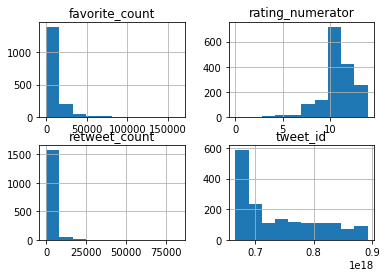

In [532]:
df_master.hist();

#### Variables to inspect & Questions to ask:

We want to inspect the Rating_numerator, retweet_count and favorite counts: 
- how do the distributions look like? 
- how are they related to one another? 
- which factor might be influencing these Outcomes?

Note: To help answer these Questions, i chose to make a categorical variable for the Ratings, grouping the Values in 5 ordered "Rating Levels" ("low (<= 9)", "medium (10 - 11)", "intermediate (12)", "high(13)" and "highest (14)").

#### Inspecting the rating variable

In [363]:
df_master.rating_numerator.describe()

count    1671.000000
mean       10.838887
std         1.778713
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        14.000000
Name: rating_numerator, dtype: float64

In [528]:
df_master.rating_numerator.median()

11.0

In [530]:
df_master.rating_numerator.value_counts()

12.00    422
10.00    360
11.00    357
13.00    229
9.00     133
8.00      68
7.00      31
14.00     24
6.00      16
5.00      13
4.00       6
3.00       5
2.00       2
13.50      1
11.27      1
0.00       1
11.26      1
9.75       1
Name: rating_numerator, dtype: int64

In [366]:
import matplotlib.pyplot as plt
%matplotlib inline

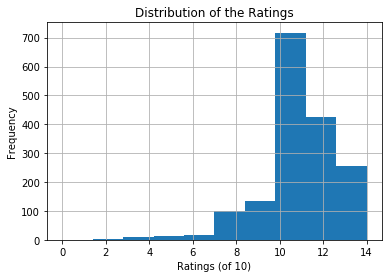

In [629]:
plt.hist(df_master.rating_numerator);
plt.grid(b=True)
plt.xlabel("Ratings (of 10)");
plt.ylabel("Frequency")
plt.title("Distribution of the Ratings");

We want to group the Ratings in different level Categories, to try and get a better Impression on how they are distributed and also to better see possible Correlations with other Variables of Interest. We create a new Column 'rating_level', containing the following categorical values: [low, medium, intermediate, high, highest], corresponding to the following rating-intervalls: [[0, 9], (9, 11], (11, 12], (12, 13], (13, 14]].  

In [429]:
bin_edges = [0.0, 9.0, 11.0, 12.0, 13.0, 14.0]
bin_labels = ['low', 'medium', 'intermediate', 'high', 'highest']
df_master['rating_level'] = pd.cut(df_master['rating_numerator'], bins=bin_edges, \
                                   labels=bin_labels, right=True, include_lowest=True)

In [430]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1671 entries, 0 to 1670
Data columns (total 12 columns):
tweet_id                1671 non-null int64
timestamp               1671 non-null object
text                    1671 non-null object
expanded_urls           1671 non-null object
rating_numerator        1671 non-null float64
name                    1671 non-null object
favorite_count          1671 non-null int64
retweet_count           1671 non-null int64
dog_stage               1671 non-null object
best_predicted_breed    1671 non-null object
jpg_url                 1671 non-null object
rating_level            1671 non-null category
dtypes: category(1), float64(1), int64(3), object(7)
memory usage: 145.5+ KB


In [534]:
grouped_ratings = df_master.groupby('rating_level').count()['rating_numerator']
locations = np.arange(len(ind))


In [535]:
grouped_ratings

rating_level
low             275
medium          718
intermediate    424
high            229
highest          25
Name: rating_numerator, dtype: int64

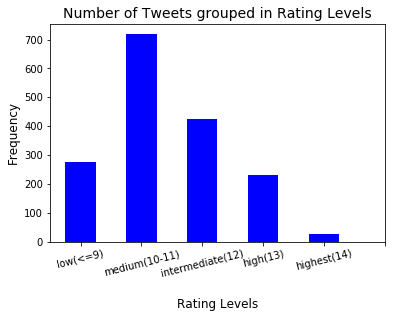

In [537]:
grouped_ratings.plot(kind='bar', color='blue');

labels_ = ["low(<=9)", "medium(10-11)", "intermediate(12)", "high(13)", "highest(14)"]
plt.xticks(locations, labels= labels_, rotation=14)
plt.title('Number of Tweets grouped in Rating Levels', fontsize=14)
plt.xlabel('\nRating Levels', fontsize=12)
plt.ylabel('Frequency', fontsize=12);

In [538]:
total_num = df_master.shape[0]
print(total_num)
proportions = grouped_ratings/total_num*100
proportions

1671


rating_level
low             16.457211
medium          42.968282
intermediate    25.374028
high            13.704369
highest          1.496110
Name: rating_numerator, dtype: float64

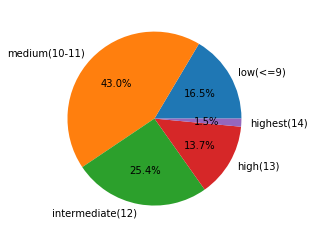

In [627]:
fig, ax = plt.subplots();
ax.pie(grouped_ratings,labels=labels_, autopct='%1.1f%%');
fig.savefig('grouped_ratings.jpg', dpi=100)

In [539]:
df_master.groupby('rating_level')['rating_numerator'].value_counts()

rating_level  rating_numerator
low           9.00                133
              8.00                 68
              7.00                 31
              6.00                 16
              5.00                 13
              4.00                  6
              3.00                  5
              2.00                  2
              0.00                  1
medium        10.00               360
              11.00               357
              9.75                  1
intermediate  12.00               422
              11.26                 1
              11.27                 1
high          13.00               229
highest       14.00                24
              13.50                 1
Name: rating_numerator, dtype: int64

#### Observation on the Rating Distribution:

The Tweets are meant to be positively rated: The overall average rating is 10.8 and <b>68.4%</b> of the Ratings are between 10 and 12. Even in the "low" rated Proportion of the Tweets (<b>16.5%</b> are <= 9), <b>73.1%</b> are between 8 and 9.<br>
A smaller Proportion of <b>15.2%</b> of the Tweets stand out with the highest Ratings between 13 and 14(which is the highest given Rating, that only 25 Tweets received)

#### Inspect the Retweet Count and Favorite Count for each rating Level

In [438]:
# Inspect the rating vs. retweet_counts
df_master.groupby('rating_level')['retweet_count'].mean()

rating_level
low              818.705455
medium          1707.279944
intermediate    2971.332547
high            6764.048035
highest         8643.000000
Name: retweet_count, dtype: float64

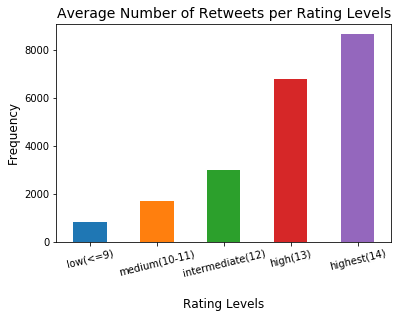

In [509]:
df_master.groupby('rating_level')['retweet_count'].mean().plot(kind='bar');
plt.xticks(locations, labels= labels_, rotation=14);
plt.title('Average Number of Retweets per Rating Levels', fontsize=14)
plt.xlabel('\nRating Levels', fontsize=12)
plt.ylabel('Frequency', fontsize=12);

In [506]:
# Now we inspect the favorite_counts vs the rating
df_master.groupby('rating_level')['favorite_count'].mean()

rating_level
low              2460.069091
medium           5155.965181
intermediate    11097.054245
high            22831.510917
highest         29320.200000
Name: favorite_count, dtype: float64

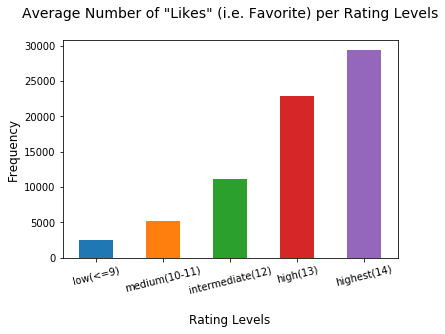

In [511]:
df_master.groupby('rating_level')['favorite_count'].mean().plot(kind='bar');
plt.xticks(locations, labels= labels_, rotation=14)
plt.title('Average Number of "Likes" (i.e. Favorite) per Rating Levels\n', fontsize=14)
plt.xlabel('\nRating Levels', fontsize=12)
plt.ylabel('Frequency', fontsize=12);

#### Observation on the Favorite and Retweet Counts per Rating Level:

As we would expect, the Popularity Factors of both the Favorite and Retweets Counts seem to have a very similar positive Correlation with the Ratings.
The higher the Rating, the higher amount of Times the Tweets were liked and retweeted.


#### How do the Favorite and Retweet Counts relate to one another?

In [513]:
df_factor = df_master['favorite_count']/df_master['retweet_count']
df_factor.describe()

count    1671.000000
mean        3.508849
std         1.158523
min         1.108904
25%         2.686159
50%         3.324597
75%         4.095715
max        11.756098
dtype: float64

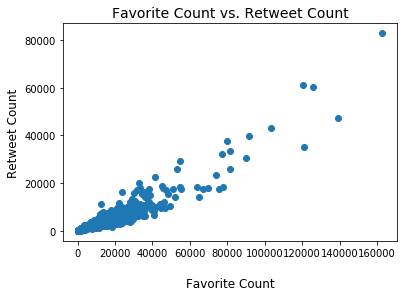

In [630]:
plt.scatter(df_master['favorite_count'], df_master['retweet_count']);

plt.title('Favorite Count vs. Retweet Count', fontsize=14)
plt.xlabel('\nFavorite Count', fontsize=12)
plt.ylabel('Retweet Count', fontsize=12);


#### Observation on the Favorite Count versus Retweet Count:
We can see there seem to be a positive Correlation between the 2 Variables. In fact the "Favorite Count" seem to be about a factor 3 bigger than the "Retweet Count". It can be that the number of times a Tweet is marked as "favorite" (i.e. "liked") affects how often the Tweet will be retweeted. It can also be that both Variables are affected by the same Factors in a similar way. 

#### Does the "dog stage" influence the Popularity of the Tweets?

In [524]:
print(df_master.dog_stage.value_counts())

None        1403
Pupper       175
Doggo         56
Puppo         25
Multiple       9
Floofer        3
Name: dog_stage, dtype: int64


In [525]:
# Inspecting the favorite_count Correlation with dog_stage
df_master.groupby('dog_stage')['rating_numerator'].median().sort_values(ascending= False)

dog_stage
Floofer     13.0
Puppo       12.0
Multiple    12.0
Doggo       12.0
Pupper      11.0
None        11.0
Name: rating_numerator, dtype: float64

In [526]:
df_master.groupby('dog_stage')['favorite_count'].median().sort_values(ascending=False)

dog_stage
Floofer     22095.0
Puppo       14727.0
Doggo       11231.5
Multiple     9279.0
None         3996.0
Pupper       3099.0
Name: favorite_count, dtype: float64

In [527]:
df_master.groupby('dog_stage')['retweet_count'].median().sort_values(ascending=False)

dog_stage
Floofer     3594
Puppo       3008
Doggo       2688
Multiple    2382
None        1294
Pupper      1053
Name: retweet_count, dtype: int64

#### Observation on the Influence of the "dog_stage" Variable on the Popularity of the Tweets:
It seems that all three Popularity Outcomes are affected by the Dog stage in the same way:
Tweets that do have a dog stage of either "Floofer", "Puppo", "Doggo" or "Multiple" tend to have a higher Rating, be marked as "favorite" and retweeted more often than Tweets without a dog_stage or marked as "Pupper".
Note: There is a strong Limitation in our Observation to be considered here, as the number of tweets having a dog stage value at all, is very small compared to the total amount of tweets (In particular, only 3 Records have a stage with the Value "Floofer") making it difficult to build a solid Analysis for this Factor.

#### Does the Dog Breed Variable influence the Ratings of the Tweets?

In [613]:
number_of_breeds = df_master.best_predicted_breed.nunique()
number_of_breeds

113

In [542]:
# Inspect the dog Breed
breed_values = df_master.best_predicted_breed.value_counts()
breed_values

golden_retriever                  155
Labrador_retriever                104
Pembroke                           95
Chihuahua                          91
pug                                62
toy_poodle                         51
chow                               47
Pomeranian                         42
Samoyed                            41
malamute                           33
Chesapeake_Bay_retriever           31
cocker_spaniel                     30
French_bulldog                     30
miniature_pinscher                 25
Eskimo_dog                         22
Cardigan                           21
Staffordshire_bullterrier          21
German_shepherd                    21
beagle                             20
Shih-Tzu                           20
Siberian_husky                     20
Rottweiler                         19
Shetland_sheepdog                  19
Maltese_dog                        19
Lakeland_terrier                   18
kuvasz                             18
Italian_grey

In [631]:
group = df_master.groupby('best_predicted_breed')['rating_numerator'].median().sort_values(ascending=False)
group20 = group[:20]
group20

best_predicted_breed
Afghan_hound                  13.0
Saluki                        13.0
Bouvier_des_Flandres          13.0
chow                          12.0
Tibetan_mastiff               12.0
Samoyed                       12.0
flat-coated_retriever         12.0
golden_retriever              12.0
Rottweiler                    12.0
Pembroke                      12.0
Pekinese                      12.0
Norfolk_terrier               12.0
Leonberg                      12.0
Irish_water_spaniel           12.0
Greater_Swiss_Mountain_dog    12.0
Gordon_setter                 12.0
Eskimo_dog                    12.0
silky_terrier                 12.0
Border_terrier                12.0
standard_schnauzer            12.0
Name: rating_numerator, dtype: float64

In [611]:
df_group20 = df_master[df_master['best_predicted_breed'].isin(group20.index)]
df_group20['best_predicted_breed'].value_counts()

golden_retriever              155
Pembroke                       95
chow                           47
Samoyed                        41
Eskimo_dog                     22
Rottweiler                     19
Pekinese                       14
flat-coated_retriever           8
Border_terrier                  7
Norfolk_terrier                 7
Tibetan_mastiff                 4
Saluki                          4
Gordon_setter                   4
Greater_Swiss_Mountain_dog      3
Afghan_hound                    3
Leonberg                        3
Irish_water_spaniel             3
standard_schnauzer              1
silky_terrier                   1
Bouvier_des_Flandres            1
Name: best_predicted_breed, dtype: int64

To be able to find out if there is a Tendency of Preferences for specific dog breeds, we would need a sufficient number of Records for these Breeds to base our Observations on. For example: for the highest Median Rating value of 13/10 there are only 3 "Afghan Hounds", 4 "Saluki" and just 1 "Bouvier des Flandres". Therefore, I chose to inspect the most common type of Breeds in the Dataset("Golden Retriever", "Labrador Retriever", "Pembroke" and "Chihuahua") and see if I can observe any Tendency of Preferences among these Breeds. 

12.0    31
11.0    26
10.0    22
13.0    15
9.0      5
8.0      3
7.0      1
14.0     1
Name: rating_numerator, dtype: int64
medium          48
intermediate    31
high            15
low              9
highest          1
Name: rating_level, dtype: int64
11.0
9.0


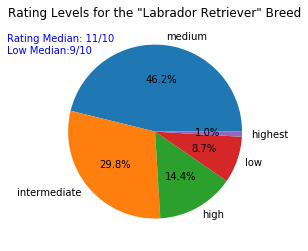

In [662]:
# Inspecting the "Labrador Retriever" Breed
df_Labrador = df_master[df_master.best_predicted_breed == "Labrador_retriever"]
print(df_Labrador.rating_numerator.value_counts())
print(df_Labrador.rating_level.value_counts())
print(df_Labrador.rating_numerator.median())
print(df_Labrador.query('rating_level == "low"')['rating_numerator'].median())
plt.pie(df_Labrador.rating_level.value_counts(), labels=df_Labrador.rating_level.value_counts().index,autopct='%1.1f%%');
plt.title("Rating Levels for the \"Labrador Retriever\" Breed")
plt.text(-1.7, 0.9, "Rating Median: 11/10\nLow Median:9/10", color='blue', fontsize=10);


intermediate    59
medium          51
high            33
low              8
highest          4
Name: rating_level, dtype: int64
12.0    59
13.0    33
11.0    29
10.0    22
9.0      6
14.0     3
8.0      2
13.5     1
Name: rating_numerator, dtype: int64
12.0
9.0


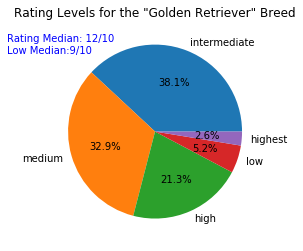

In [661]:
# Inspecting the Golden Retriever Breed
df_golden = df_master[df_master.best_predicted_breed == "golden_retriever"]
print(df_golden.rating_level.value_counts())
print(df_golden['rating_numerator'].value_counts())
print(df_golden['rating_numerator'].median())
print(df_golden.query('rating_level == "low"')['rating_numerator'].median())
plt.pie(df_golden.rating_level.value_counts(), labels=df_golden.rating_level.value_counts().index,autopct='%1.1f%%');
plt.title("Rating Levels for the \"Golden Retriever\" Breed")
plt.text(-1.7, 0.9, "Rating Median: 12/10\nLow Median:9/10", color='blue', fontsize=10);


medium          37
intermediate    30
high            18
low              6
highest          4
Name: rating_level, dtype: int64
12.0    30
11.0    26
13.0    18
10.0    11
14.0     4
8.0      2
7.0      1
6.0      1
4.0      1
5.0      1
Name: rating_numerator, dtype: int64
12.0
6.5


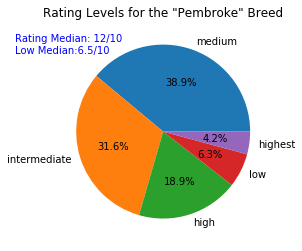

In [660]:
# Inspecting the "Pembroke" Breed
df_pembroke = df_master[df_master.best_predicted_breed == "Pembroke"]
print(df_pembroke.rating_level.value_counts())
print(df_pembroke['rating_numerator'].value_counts())
print(df_pembroke['rating_numerator'].median())
print(df_pembroke.query('rating_level == "low"')['rating_numerator'].median())
plt.pie(df_pembroke.rating_level.value_counts(), labels=df_pembroke.rating_level.value_counts().index,autopct='%1.1f%%');
plt.title("Rating Levels for the \"Pembroke\" Breed")
plt.text(-1.7, 0.9, "Rating Median: 12/10\nLow Median:6.5/10", color='blue', fontsize=10);


medium          34
intermediate    23
low             21
high            12
highest          1
Name: rating_level, dtype: int64
12.0    23
10.0    21
11.0    13
13.0    12
9.0     10
7.0      5
8.0      3
5.0      1
4.0      1
3.0      1
14.0     1
Name: rating_numerator, dtype: int64
11.0
8.0


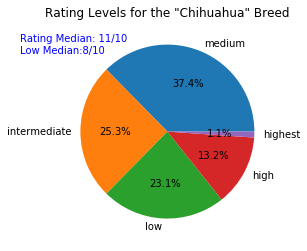

In [659]:
# Inspecting the "Chihuahua" Breed
df_chihuahua = df_master[df_master.best_predicted_breed == "Chihuahua"]
print(df_chihuahua.rating_level.value_counts())
print(df_chihuahua['rating_numerator'].value_counts())
print(df_chihuahua['rating_numerator'].median())
print(df_chihuahua.query('rating_level == "low"')['rating_numerator'].median())
plt.pie(df_chihuahua.rating_level.value_counts(), labels=df_chihuahua.rating_level.value_counts().index,autopct='%1.1f%%');
plt.title("Rating Levels for the \"Chihuahua\" Breed")
plt.text(-1.7, 0.9, "Rating Median: 11/10\nLow Median:8/10", color='blue', fontsize=10);


#### Observation on the Influence of the dog breed on the Ratings for the most common Breed: 
<br>
In comparing the Median Values for the Ratings and the respective Proportions of Rating Levels for the four most common Breeds, I can observe the following:

1) There seem to be slightly more higher Ratings for the "Golden Retriever" than for the "Pembroke". Both Breeds having the same value of 12/10 for the Median of the ratings, the "Golden Retriever" has a Proportion of 94.9% of Ratings that are equal or higher than 10/10, versus 93.6% for the "Pembroke" Breed. Also, the "Golden Retriever" Breed has a Median value of 9/10 in the "low" Rating Level, versus 6.5/10 for the "Pembroke".<br>
2) The "Pembroke" has a Median rating value of 12/10 versus 11/10 for the "Labrador Retriever".<br>
3) The "Labrador Retriever" and the "Chihuahua" both have a Median rating value of 11/10. The "Labrador" Breed has a Proportion of 91.4% of ratings that are equal or higher than 10/10, versus 77% for the "Chihuahua" and the Median values for the ratings in the "low" level Category compare to 9/10 for the "Labrador", versus 8/10 for the Chihuahua. So there seems to be slightly more higher ratings for the "Labrador Retriever" Breed, than for the "Chihuahua". 